In [1]:
import numpy as np

In [243]:
"""
    造造造数据:二分类数据
"""
Z = np.random.uniform(0,2,size=[50,2])
H = np.random.uniform(3,5,size=[50,2])
J = np.vstack((Z,H))
np.savetxt("data/testSet2.txt",J)

In [199]:
"""
    读取数据集
    
    Args:
        filename:文件名
    Returns:
        dataMat:数据样本矩阵
"""
def loadDataSet(filename):
    dataMat = []
    with open(filename, 'rb') as f:       
        for line in f:
            line = line.decode('utf-8').strip()
            eles = list(map(float, line.split(' ')[:5]))
            dataMat.append(eles)
    return dataMat

In [153]:
"""
    计算两向量的欧式距离
    
    Args:
        vecA:向量A
        vecB:向量B
    Returns:
        欧式距离
"""
def distEclud(vecA, vecB):
    print(vecA)
    print(vecB)
    return np.sqrt(np.sum(np.power((vecA - vecB),2)))

In [154]:
"""
    随机生成k个聚类中心
    
    Args:
        dataSet:数据集
        k:簇数目
    Returns:
        centroids:聚类中心矩阵
"""
def randCent(dataSet, k):
    m,_ =dataSet.shape
    #随机从数据集中选几个作为初始聚类中心
    centroids = dataSet.take(np.random.choice(m,k), axis=0)
    return centroids

In [155]:
"""
    K-Means
    
    Args:
        dataSet:数据集
        k:簇数目
    Returns:
        centroids:聚类中心
        clusterAssment:点分配结果
"""
def kMeans(dataSet, k, maxlter = 5):
    # 随机初始化聚类中心
    centroids = randCent(dataSet, k)
    init_centroids = centroids.copy()
    
    m, n = np.shape(dataSet)
    
    #点分配结果：第一列指明样本所在的簇，第二列指明样本到簇类中心的距离
    clusterAssment = np.mat(np.zeros((m,2)))
    
    #标识聚类中心石方仍在改变
    clusterChanged = True
    
    #直至聚类中心不再变化
    iterCount = 0
    while clusterChanged and iterCount < maxlter:
        iterCount += 1
        clusterChanged = False
        #分配样本到簇
        for i in range(m):
            #计算第i个样本到各个聚类中心的距离
            minIndex = 0
            minDist = np.inf
            for j in range(k):
                dist = distEclud(dataSet[i, :],centroids[j, :])
                if(dist < minDist):
                    minIndex = j
                    minDist = dist
            #任何一个样本的类簇分配发生变化则认为变化
            if(clusterAssment[i,0]!=minIndex):
                clusterChanged = True
            clusterAssment[i, :] = minIndex , minDist**2
            
        #刷新聚类中：移动聚类中心到所在簇的均值位置
        for cent in range(k):
            #通过数组过滤获得簇中的点
            pstInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == cent)[0]]
            if pstInCluster.shape[0] > 0:
                #计算均值并移动
                centroids[cent,:] = np.mean(pstInCluster, axis=0)
    return centroids, clusterAssment, init_centroids

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
dataMat = np.mat(loadDataSet('data/testSet2.txt'))
m,n = np.shape(dataMat)

In [245]:
set_k = 2
centroids , clusterAssment, init_centroids = kMeans(dataMat,set_k)

clusterCount = np.shape(centroids)[0]
#注意，这里我们只假设了最多4个簇的样式，所以前面如果set_k设置超过了4，这里会报错
patterns = ['o','D','^','s'] 
colors = ['b','g','y','black']

[[ 0.30111131  1.50462873]]
[[ 0.77173668  0.7890125 ]]
[[ 0.30111131  1.50462873]]
[[ 4.2519453   3.99065663]]
[[ 1.59582376  0.06894178]]
[[ 0.77173668  0.7890125 ]]
[[ 1.59582376  0.06894178]]
[[ 4.2519453   3.99065663]]
[[ 1.84159619  0.32638555]]
[[ 0.77173668  0.7890125 ]]
[[ 1.84159619  0.32638555]]
[[ 4.2519453   3.99065663]]
[[ 1.56214363  0.80137775]]
[[ 0.77173668  0.7890125 ]]
[[ 1.56214363  0.80137775]]
[[ 4.2519453   3.99065663]]
[[ 1.00796438  1.17291102]]
[[ 0.77173668  0.7890125 ]]
[[ 1.00796438  1.17291102]]
[[ 4.2519453   3.99065663]]
[[ 1.11211834  1.63390757]]
[[ 0.77173668  0.7890125 ]]
[[ 1.11211834  1.63390757]]
[[ 4.2519453   3.99065663]]
[[ 0.58805751  1.65691464]]
[[ 0.77173668  0.7890125 ]]
[[ 0.58805751  1.65691464]]
[[ 4.2519453   3.99065663]]
[[ 0.83571106  0.82968882]]
[[ 0.77173668  0.7890125 ]]
[[ 0.83571106  0.82968882]]
[[ 4.2519453   3.99065663]]
[[ 0.21724083  0.99325298]]
[[ 0.77173668  0.7890125 ]]
[[ 0.21724083  0.99325298]]
[[ 4.2519453   3.990

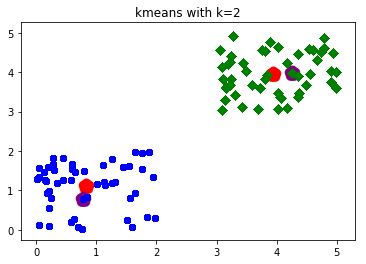

In [246]:
fig = plt.figure()
title = "kmeans with k={}".format(set_k)
ax = fig.add_subplot(111, title=title)
for k in range(clusterCount):
     #绘制聚类中心
    ax.scatter(centroids[k, 0], centroids[k, 1], color='r',marker='*',linewidths=10)
    #绘制初始化聚类中心
    ax.scatter(init_centroids[k, 0], init_centroids[k, 1], color='purple',marker='*',linewidths=10)
    for i in range(m):
        #绘制属于该聚类中心的样本
        pstInCluster = dataMat[np.nonzero(clusterAssment[:, 0].A==k)[0]]
        ax.scatter(pstInCluster[:, 0].flatten().A[0],pstInCluster[:, 1].flatten().A[0], marker=patterns[k],color=colors[k])